# PCA: Best Places to Live
Let us use PCA to interpret this data better and determine best places to live from the data provided about cities in US.

In [107]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

The code below reads the contents of a file named 'places.txt' encoded in Latin-1. It splits the data into individual lines and creates an empty list.

Then, it processes each line by replacing consecutive whitespace with '#' and splitting it into values. Only the first 10 values are kept. These processed lists are appended to the empty list.

Finally, the data is converted into a DataFrame with predefined column names. The resulting DataFrame contains the extracted values from the file.

In [108]:
with open('places.txt', 'r', encoding="latin-1") as file:
    places_data = file.readlines()

places_data_list = [re.sub(r"\s+", '#', record).split('#')[:10] for record in places_data]

columns = ["Location", "climate", "housing", "healthcare", "crime", "transportation",
           "education", "arts", "recreation", "economic_welfare"]

places_DF = pd.DataFrame(places_data_list, columns=columns)

places_DF.head(10)


,Location,climate,housing,healthcare,crime,transportation,education,arts,recreation,economic_welfare
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727
5,"Alexandria,LA",520,5819,640,727,2444,2972,334,1018,5254
6,"Allentown,Bethlehem,PA-NJ",559,8288,621,514,2881,3144,2333,1117,5097
7,"Alton,Granite-City,IL",537,6487,965,706,4975,2945,1487,1280,5795
8,"Altoona,PA",561,6191,432,399,4246,2778,256,1210,4230
9,"Amarillo,TX",609,6546,669,1073,4902,2852,1235,1109,6241


In [109]:
# Filter the values in the DataFrame convert them to their base-10 logarithm

X = places_DF.iloc[:, 1:].apply(pd.to_numeric).apply(np.log10)
X.head()

,climate,housing,healthcare,crime,transportation,education,arts,recreation,economic_welfare
0,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695
1,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489
2,2.670246,3.865637,2.790988,2.986772,3.403292,3.408240,2.374748,2.933993,3.720159
3,2.677607,3.898067,3.155640,2.785330,3.837778,3.531351,3.667920,3.208710,3.768194
4,2.818885,3.923917,3.267875,3.171141,3.816771,3.480869,3.652826,3.416973,3.757927


#### Now we perform PCA on our data
  To center the data points by computing mean and subtracting it from every point

In [110]:
X = (X-X.mean())
X.head(10)

,climate,housing,healthcare,crime,transportation,education,arts,recreation,economic_welfare
0,-0.001656,-0.115099,-0.580738,0.013575,0.008211,-0.006170,-0.207950,-0.078891,0.148513
1,0.041174,0.003027,0.263574,-0.004193,0.091485,-0.059573,0.539178,0.193719,-0.095693
2,-0.048248,-0.041854,-0.164498,0.035145,-0.193910,-0.038367,-0.831461,-0.292574,-0.014023
3,-0.040887,-0.009424,0.200153,-0.166297,0.240576,0.084745,0.461710,-0.017857,0.034012
4,0.100391,0.016426,0.312389,0.219514,0.219570,0.034262,0.446617,0.190406,0.023745
5,-0.002491,-0.142643,-0.149307,-0.090093,-0.209100,0.026442,-0.682463,-0.218820,-0.013692
6,0.028918,0.010959,-0.162395,-0.240664,-0.137658,0.050876,0.161705,-0.178514,-0.026867
7,0.011480,-0.095447,0.029041,-0.102822,0.099591,0.022479,-0.033898,-0.119357,0.028871
8,0.030469,-0.115730,-0.320003,-0.350654,0.030778,-0.002874,-0.797969,-0.143782,-0.107842
9,0.066123,-0.091515,-0.130060,0.078973,0.093172,0.008543,-0.114542,-0.181636,0.061072


In [111]:
'Compute the Singular Value Decomposition (SVD) of matrix X to obtain U, Sigma, and VT. Multiply U and Sigma to obtain X_svd.'

U, Sigma, VT = np.linalg.svd(X,full_matrices=False,compute_uv=True)
X_svd = np.dot(U, np.diag(Sigma))
X_svd

array([[-0.43667707,  0.42016341,  0.11812095, ...,  0.07777664,
        -0.14287017, -0.00298768],
       [ 0.6209576 ,  0.0053458 , -0.00180816, ..., -0.13477659,
         0.0276786 , -0.0677809 ],
       [-0.87325632, -0.21210364, -0.04969289, ...,  0.04428388,
         0.06594874, -0.00964331],
       ...,
       [-0.32726868, -0.1576827 ,  0.36942695, ...,  0.06547898,
         0.01634915,  0.0260881 ],
       [ 0.21343283, -0.04329752,  0.14738603, ..., -0.13178498,
         0.05264626,  0.03219903],
       [-1.2910218 ,  0.13022263, -0.11567313, ...,  0.05225957,
         0.11276481, -0.00145004]])

In [112]:
'Create a DataFrame named pca_df with columns PCA1 to PCA9, using the values from X_svd.'

pca_df = pd.DataFrame(X_svd, columns = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"])
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-0.436677,0.420163,0.118121,0.089959,0.080968,0.005028,0.077777,-0.142870,-0.002988
1,0.620958,0.005346,-0.001808,-0.100745,-0.021650,0.027288,-0.134777,0.027679,-0.067781
2,-0.873256,-0.212104,-0.049693,0.171612,-0.026654,-0.044418,0.044284,0.065949,-0.009643
3,0.502948,-0.063621,0.170495,-0.112303,0.196313,0.045515,0.030802,-0.087271,0.036426
4,0.609775,-0.007233,-0.233127,0.050234,0.071192,0.059613,-0.047273,-0.046733,0.000952
...,...,...,...,...,...,...,...,...,...
324,0.108220,-0.367957,0.162583,0.076354,-0.007066,0.058827,0.050997,0.012201,0.047509
325,-0.356347,0.380630,-0.043574,0.021200,0.003381,0.003352,-0.094349,-0.006607,-0.012469
326,-0.327269,-0.157683,0.369427,-0.018379,-0.140464,0.043647,0.065479,0.016349,0.026088
327,0.213433,-0.043298,0.147386,0.114287,-0.054178,0.028072,-0.131785,0.052646,0.032199


In [113]:
'Now we calculate correlations for first 2 columns'

rating = ["climate", "housing", "healthcare", "crime", "transportation", "education", "arts", "recreation", "economic_welfare"]
X1 = X[rating].apply(pd.to_numeric)

correlations = X1.corrwith(pca_df["PCA1"])
for i, correlation in enumerate(correlations):
    print(f"{rating[i]}: {correlation}")

climate: 0.18977642204093312
housing: 0.5439782622561288
healthcare: 0.7816314582889667
crime: 0.3648400173461683
transportation: 0.5852356435937164
education: 0.3935162225588714
arts: 0.9854002624302368
recreation: 0.5198620812518138
economic_welfare: 0.1417744750332003


In [114]:
correlations = X1.corrwith(pca_df["PCA2"])
for i, correlation in enumerate(correlations):
    print(f"{rating[i]}: {correlation}")


climate: 0.017667134994132444
housing: 0.019781476374612358
healthcare: -0.6052287146230877
crime: 0.294443080760321
transportation: 0.08489042129618372
education: -0.2727092136190497
arts: 0.1259213297391089
recreation: 0.40161376439554036
economic_welfare: 0.15004959875739374


In [115]:
# Computing the principal components V1 and V2

labels= ['V'+str(i) for i in range(1,3)]
location_DF = places_DF["Location"].str.split(',').str.get(0)
svd_df = pd.DataFrame(U[:,0:2], index = location_DF.tolist(), columns=labels)
svd_df = svd_df.reset_index()
svd_df.rename(columns={'index':'Location'}, inplace=True)
svd_df

,Location,V1,V2
0,Abilene,-0.039245,0.102677
1,Akron,0.055807,0.001306
2,Albany,-0.078482,-0.051833
3,Albany-Schenectady-Troy,0.045201,-0.015547
4,Albuquerque,0.054802,-0.001767
...,...,...,...
324,Worcester,0.009726,-0.089919
325,Yakima,-0.032026,0.093016
326,York,-0.029412,-0.038534
327,Youngstown-Warren,0.019182,-0.010581


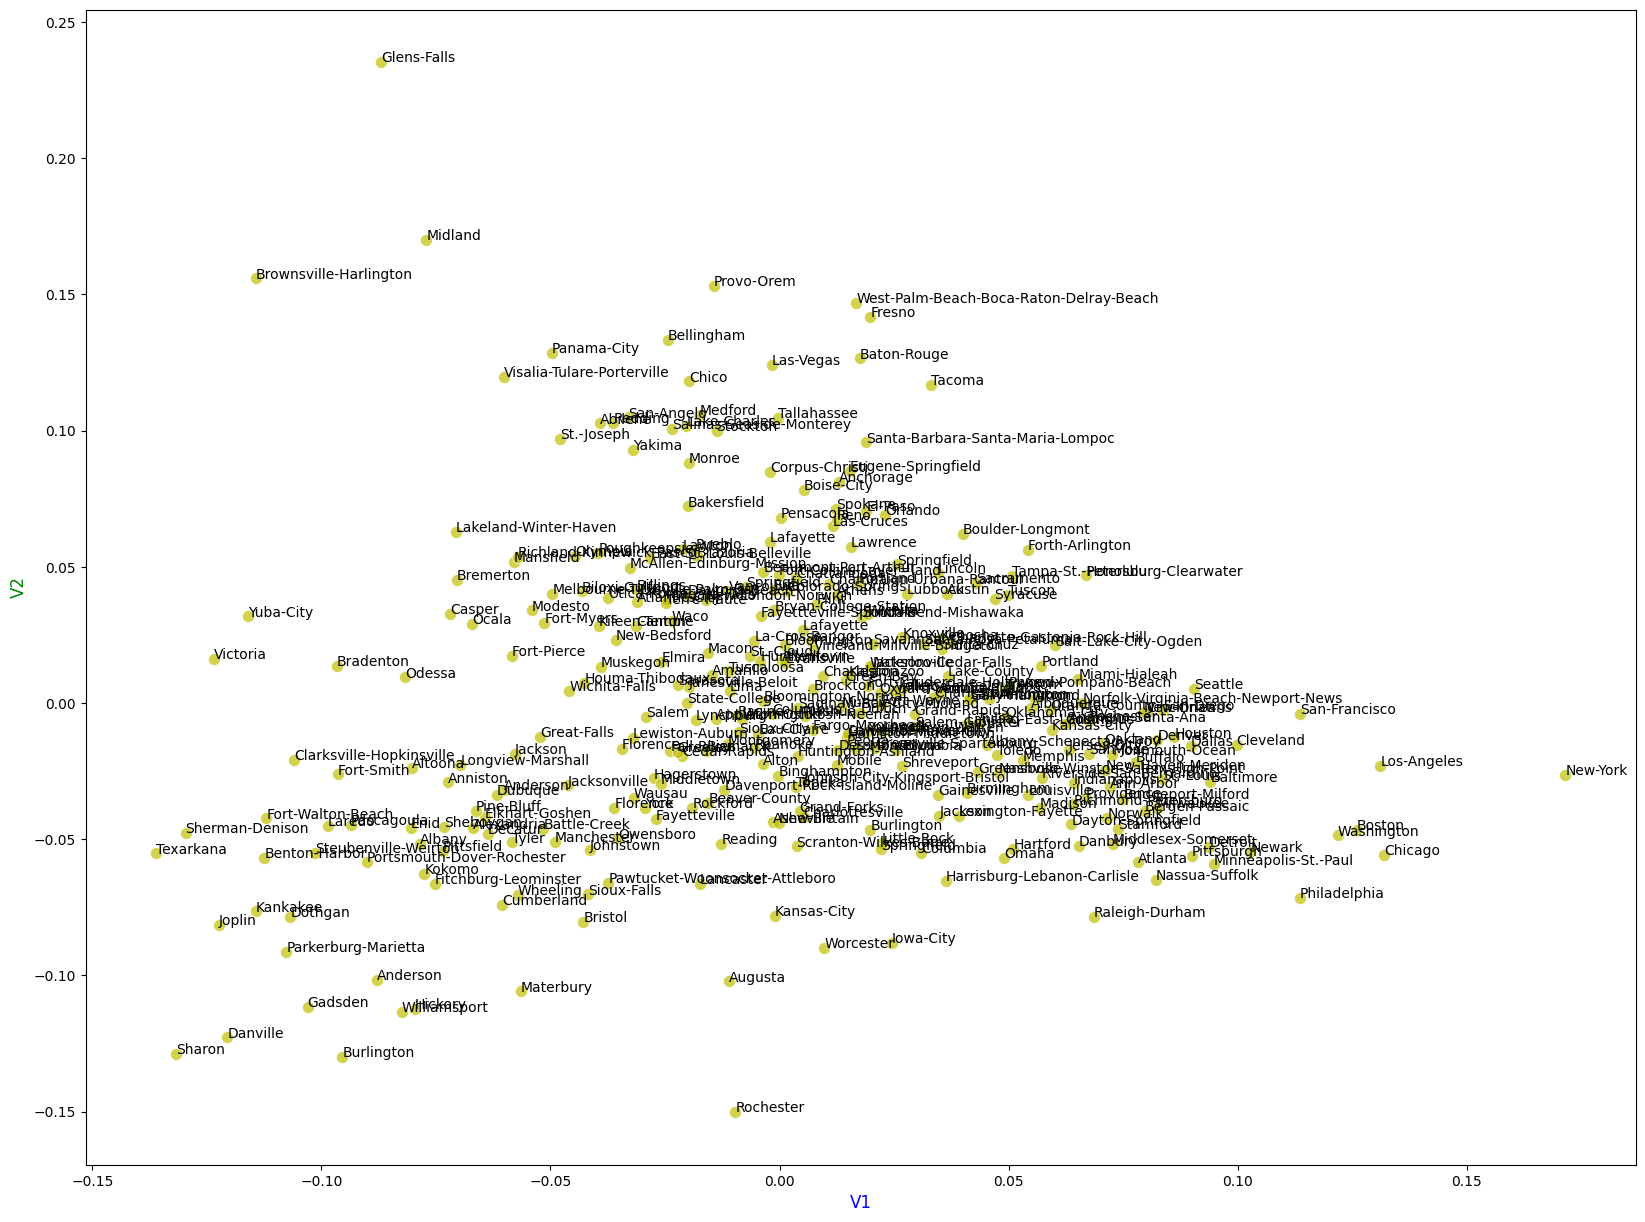

In [116]:
"""The code creates a scatter plot using V1 and V2 columns from the svd_df DataFrame.
The plot is customized with a larger figure size, point size, and transparency.
The x and y axis labels are set with different colors and font sizes.
Annotations are added to the plot with the corresponding location names from the svd_df DataFrame.
"""

V1 = svd_df.V1
V2 = svd_df.V2

plt.figure(figsize=(20,15))
scatter = sns.scatterplot(x="V1", y="V2", data=svd_df, s=75, alpha=0.7, color='y')

scatter.set_xlabel('V1', color='blue', fontsize=12)
scatter.set_ylabel('V2', color='green', fontsize=12)

for i, location in enumerate(svd_df["Location"]):
  plt.annotate(location, (V1[i],V2[i]))


In [117]:
'The code performs singular value decomposition (SVD) on matrix X, creates a DataFrame with PCA components,'
'and concatenates two PCA components into a single DataFrame.'

def svd(X):

    U, Sigma, VT = np.linalg.svd(X,full_matrices=False,compute_uv=True)
    # Claculating PCA using U and Diagonal values of sigma
    X_svd = np.dot(U, np.diag(Sigma))
    return X_svd

x_svd = svd(X)
pca_df = pd.DataFrame(x_svd, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9"])
v1 = pca_df["PCA1"]
v2 = pca_df["PCA2"]

result = pd.concat([v1, v2])
result

0     -0.436677
1      0.620958
2     -0.873256
3      0.502948
4      0.609775
         ...   
324   -0.367957
325    0.380630
326   -0.157683
327   -0.043298
328    0.130223
Length: 658, dtype: float64